# Employee Retention Analysis

In [75]:
#Import necessary modules

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix

In [76]:
#Loading of dataset

df1 = pd.read_csv('Employee.csv')

print('Number of rows in the dataframe: %i' % (df1.shape[0]))
print('Number of columns in the dataframe: %i\n' % (df1.shape[1]))
print(list(df1.columns))

Number of rows in the dataframe: 1470
Number of columns in the dataframe: 13

['Gender', 'Age', 'JobSatisfaction', 'DistanceFromHome', 'WorkLifeBalance', 'OverTime', 'TotalWorkingYears', 'PerformanceRating', 'YearsSinceLastPromotion', 'MaritalStatus', 'MonthlyIncome', 'PercentSalaryHike', 'Attrition']


In [77]:
#Displaying the first 5 rows of all columns
df1.head()

,Gender,Age,JobSatisfaction,DistanceFromHome,WorkLifeBalance,OverTime,TotalWorkingYears,PerformanceRating,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,PercentSalaryHike,Attrition
0,Female,41,4,1,1,Yes,8,3,0,Single,5993,11,Yes
1,Male,49,2,8,3,No,10,4,1,Married,5130,23,No
2,Male,37,3,2,3,Yes,7,3,0,Single,2090,15,Yes
3,Female,33,3,3,3,Yes,8,3,3,Married,2909,11,No
4,Male,27,2,2,3,No,6,3,2,Married,3468,12,No


In [78]:
#To get the datatypes of columns
df1.dtypes

Gender                     object
Age                         int64
JobSatisfaction             int64
DistanceFromHome            int64
WorkLifeBalance             int64
OverTime                   object
TotalWorkingYears           int64
PerformanceRating           int64
YearsSinceLastPromotion     int64
MaritalStatus              object
MonthlyIncome               int64
PercentSalaryHike           int64
Attrition                  object
dtype: object

In [79]:
#Finding the total number of null values in each column 
df1.isnull().sum()

Gender                     0
Age                        0
JobSatisfaction            0
DistanceFromHome           0
WorkLifeBalance            0
OverTime                   0
TotalWorkingYears          0
PerformanceRating          0
YearsSinceLastPromotion    0
MaritalStatus              0
MonthlyIncome              0
PercentSalaryHike          0
Attrition                  0
dtype: int64

In [80]:
#Check for missing/null values
df1.isnull().values.any()

False

In [81]:
#The above output shows all the columns has 0 null values and result is also FALSE so it means there's no need of imputation

In [82]:
#To view some statistical data
# df1.describe()

In [83]:
#Get the count of the number of employees that stayed and left the firm
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [84]:
#Among 1470, 1233 employees are in company and 237 have left the company

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Attrition', ylabel='count'>

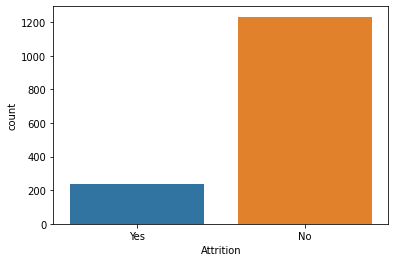

In [85]:
#Visualizing the number of employees that stayed and left the firm
sns.countplot(df1['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

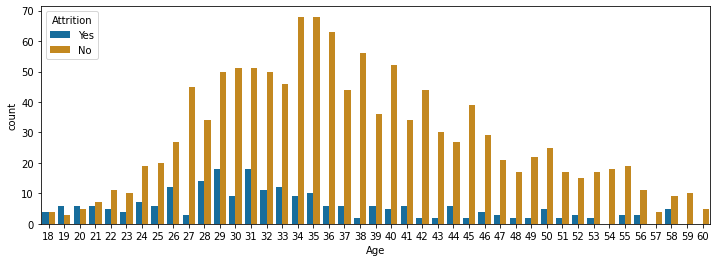

In [86]:
#To view number of employees left and stayed by 'Age'
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df1, palette='colorblind')

In [87]:
#As per the graph, employees of age from 29-31 have majority left company and employees of age from 34-36 didn't leave company

In [88]:
#Print all the datatypes and their unique values
for column in df1.columns:
    if df1[column].dtype == object:
        print(str(column) + ' : '+str(df1[column].unique()))
        print(df1[column].value_counts())
        print('______________________________________________________')

Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
______________________________________________________
OverTime : ['Yes' 'No']
No     1054
Yes     416
Name: OverTime, dtype: int64
______________________________________________________
MaritalStatus : ['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
______________________________________________________
Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
______________________________________________________


In [89]:
#Dropping ineffective columns which aren't important for attrition prediction

# df2 = df1.drop(['BusinessTravel', 'DailyRate', 'Department', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis='columns')

In [90]:
print('Number of rows in the dataframe: %i' % (df1.shape[0]))
print('Number of columns after removal in the dataframe: %i\n' % (df1.shape[1]))

Number of rows in the dataframe: 1470
Number of columns after removal in the dataframe: 13



In [91]:
#Finding correlation matrix
corr_mat = df1.corr()
corr_mat

,Age,JobSatisfaction,DistanceFromHome,WorkLifeBalance,TotalWorkingYears,PerformanceRating,YearsSinceLastPromotion,MonthlyIncome,PercentSalaryHike
Age,1.000000,-0.004892,-0.001686,-0.021490,0.680381,0.001904,0.216513,0.497855,0.003634
JobSatisfaction,-0.004892,1.000000,-0.003669,-0.019459,-0.020185,0.002297,-0.018214,-0.007157,0.020002
DistanceFromHome,-0.001686,-0.003669,1.000000,-0.026556,0.004628,0.027110,0.010029,-0.017014,0.040235
WorkLifeBalance,-0.021490,-0.019459,-0.026556,1.000000,0.001008,0.002572,0.008941,0.030683,-0.003280
TotalWorkingYears,0.680381,-0.020185,0.004628,0.001008,1.000000,0.006744,0.404858,0.772893,-0.020608
PerformanceRating,0.001904,0.002297,0.027110,0.002572,0.006744,1.000000,0.017896,-0.017120,0.773550
YearsSinceLastPromotion,0.216513,-0.018214,0.010029,0.008941,0.404858,0.017896,1.000000,0.344978,-0.022154
MonthlyIncome,0.497855,-0.007157,-0.017014,0.030683,0.772893,-0.017120,0.344978,1.000000,-0.027269
PercentSalaryHike,0.003634,0.020002,0.040235,-0.003280,-0.020608,0.773550,-0.022154,-0.027269,1.000000


<AxesSubplot:>

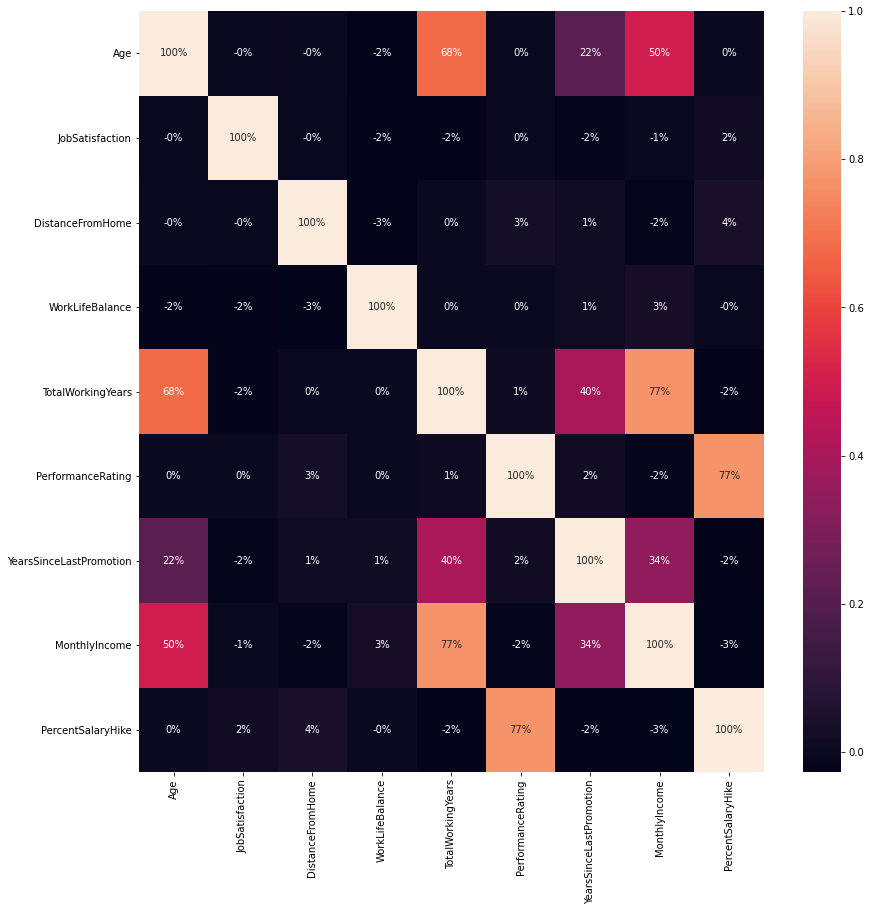

In [92]:
#Visualizing correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(corr_mat, annot = True, fmt = '.0%')

In [93]:
#Transforming categorical(non-numerical) column values into numerical -> One-Hot Encoding
for column in df1.columns:
    if df1[column].dtype == np.number:
        continue
    df1[column] = LabelEncoder().fit_transform(df1[column])      

In [94]:
df1.head()

,Gender,Age,JobSatisfaction,DistanceFromHome,WorkLifeBalance,OverTime,TotalWorkingYears,PerformanceRating,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,PercentSalaryHike,Attrition
0,0,23,3,0,0,1,8,0,0,2,809,0,1
1,1,31,1,7,2,0,10,1,1,1,682,12,0
2,1,19,2,1,2,1,7,0,0,2,62,4,1
3,0,15,2,2,2,1,8,0,3,1,313,0,0
4,1,9,1,1,2,0,6,0,2,1,399,1,0


In [95]:
#In the above dataframe we can notice all the non-numerical column values are converted into numerical values

# Splitting the dataset into Training : Testing 

In [96]:
x = df1.drop('Attrition',axis = 'columns')
x.head()

,Gender,Age,JobSatisfaction,DistanceFromHome,WorkLifeBalance,OverTime,TotalWorkingYears,PerformanceRating,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,PercentSalaryHike
0,0,23,3,0,0,1,8,0,0,2,809,0
1,1,31,1,7,2,0,10,1,1,1,682,12
2,1,19,2,1,2,1,7,0,0,2,62,4
3,0,15,2,2,2,1,8,0,3,1,313,0
4,1,9,1,1,2,0,6,0,2,1,399,1


In [97]:
y = df1.Attrition
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [98]:
xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
xtrain.shape

(1176, 12)

In [100]:
xtest.shape

(294, 12)

In [101]:
ytrain.shape

(1176,)

In [102]:
ytest.shape

(294,)

In [103]:
len(xtrain.columns)

12

# Feature Scaling and Normalizing

In [104]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [105]:
xtrain

array([[ 0.81447304, -1.38855944, -1.58233648, ..., -1.48641297,
        -1.31578569, -0.33924934],
       [ 0.81447304, -2.04073779,  1.15283407, ...,  1.27071897,
        -1.62097364, -0.06636478],
       [ 0.81447304, -0.84507748,  1.15283407, ..., -1.48641297,
         0.70862775, -0.33924934],
       ...,
       [ 0.81447304, -1.60595222,  1.15283407, ..., -0.107847  ,
        -0.86309022, -1.15790303],
       [ 0.81447304, -0.84507748, -0.67061296, ..., -0.107847  ,
        -0.41039476, -0.61213391],
       [ 0.81447304,  1.43754676,  0.24111056, ..., -0.107847  ,
         1.7310074 ,  0.20651978]])

# Model Building & Evaluation

# Logistic Regression

In [106]:
#Train the model

lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
#Test the model
pred1 = lr_model.predict(xtest)
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
#Checking precision, recall, f1-score
print(classification_report(ytest, pred1))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



In [109]:
#Accuracy Evaluation 
lr_ac = accuracy_score(ytest, pred1)
lr_ac

0.8741496598639455

In [110]:
# Mean Absolute Error

lr_mae = mean_absolute_error(ytest, pred1)
lr_mae

0.12585034013605442

<AxesSubplot:>

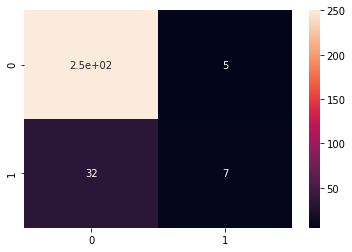

In [111]:
#Confusion Matrix

cm = confusion_matrix(ytest, pred1)
sns.heatmap(cm, annot=True)

# Random Forest

In [112]:
#Fit,Train the model

rf_model =  RandomForestClassifier(n_estimators = 19, criterion = 'entropy', random_state = 0 )
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [113]:
#Test the model
pred2 = rf_model.predict(xtest)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [114]:
#Checking precision, recall, f1-score
print(classification_report(ytest, pred2))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.27      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.57      0.52      0.52       294
weighted avg       0.79      0.85      0.81       294



In [115]:
#Accuracy Evaluation 
rf_ac = accuracy_score(ytest, pred2)
rf_ac

0.8503401360544217

In [116]:
# Mean Absolute Error

rf_mae = mean_absolute_error(ytest, pred2)
rf_mae

0.14965986394557823

<AxesSubplot:>

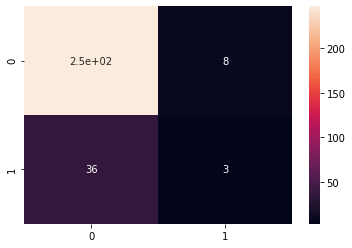

In [117]:
#Confusion Matrix

cm = confusion_matrix(ytest, pred2)
sns.heatmap(cm, annot=True)

In [118]:
#Confusion Matrix

cm = confusion_matrix(ytest, pred2)

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print("Model testing accuracy = {}".format((TP+TN)/(TP + TN + FN + FP)))

[[247   8]
 [ 36   3]]
Model testing accuracy = 0.8503401360544217


# Gradient Boosting

In [119]:
#Fit and Train the model

gb_model = GradientBoostingClassifier()
gb_model.fit(xtrain, ytrain)

#Test the model
pred3 = gb_model.predict(xtest)
pred3

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
#Checking precision, recall, f1-score
print(classification_report(ytest, pred3))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.29      0.10      0.15        39

    accuracy                           0.85       294
   macro avg       0.58      0.53      0.53       294
weighted avg       0.80      0.85      0.81       294



In [121]:
#Accuracy Evaluation 
gb_ac = accuracy_score(ytest, pred3)
gb_ac

0.8469387755102041

In [122]:
# Mean Absolute Error

gb_mae = mean_absolute_error(ytest, pred3)
gb_mae

0.15306122448979592

<AxesSubplot:>

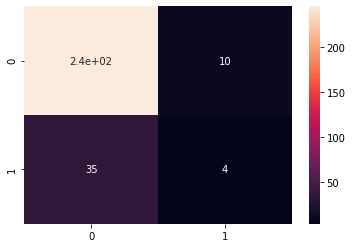

In [123]:
#Confusion Matrix

cm = confusion_matrix(ytest, pred3)
sns.heatmap(cm, annot=True)

# XGBOOST MODEL BUILDING

In [124]:
#Train the model
xg_model = XGBClassifier()
eval_set = [(xtest, ytest)]
xg_model.fit(xtrain, ytrain, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
#early_stopping_rounds = for controlling the patience of how many iterations we will wait for the next decrease in the loss value. We need this parameter because the loss values decrease randomly in each iteration.
#it will train untill validation hasn't improved in 10 rounds

[0]	validation_0-logloss:0.55334
[1]	validation_0-logloss:0.47906
[2]	validation_0-logloss:0.43223
[3]	validation_0-logloss:0.40391
[4]	validation_0-logloss:0.39037
[5]	validation_0-logloss:0.38046
[6]	validation_0-logloss:0.37535
[7]	validation_0-logloss:0.36798
[8]	validation_0-logloss:0.36059
[9]	validation_0-logloss:0.36618
[10]	validation_0-logloss:0.36863
[11]	validation_0-logloss:0.36999
[12]	validation_0-logloss:0.37117
[13]	validation_0-logloss:0.37037
[14]	validation_0-logloss:0.37327
[15]	validation_0-logloss:0.37555
[16]	validation_0-logloss:0.37789
[17]	validation_0-logloss:0.37989
[18]	validation_0-logloss:0.37913


C:\Users\dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [125]:
#Test the model

pred4 = xg_model.predict(xtest)
pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# XGBOOST MODEL EVALUATION

In [126]:
#check precision, recall, f1-score
print(classification_report(ytest, pred4))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.38      0.15      0.22        39

    accuracy                           0.85       294
   macro avg       0.63      0.56      0.57       294
weighted avg       0.81      0.85      0.83       294



In [127]:
#Accuracy Evaluation
xg_ac = accuracy_score(ytest, pred4)
xg_ac

0.8537414965986394

In [128]:
# Mean Absolute Error

xg_mae = mean_absolute_error(ytest, pred4)
xg_mae

0.14625850340136054

<AxesSubplot:>

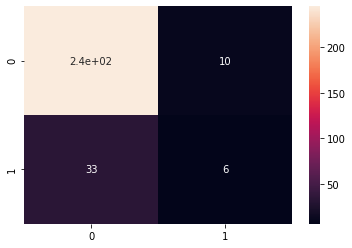

In [129]:
#Confusion Matrix

cm = confusion_matrix(ytest, pred4)
sns.heatmap(cm, annot=True)

# ANN

In [130]:
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(30, input_shape=(31,), activation='relu'),
#     keras.layers.Dense(25, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# # opt = keras.optimizers.Adam(learning_rate=0.01)

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(xtrain, ytrain, epochs=450)#450

In [131]:
#from pandas_profiling import ProfileReport

import pandas_profiling
from pandas_profiling import ProfileReport

In [132]:
df1.head()

,Gender,Age,JobSatisfaction,DistanceFromHome,WorkLifeBalance,OverTime,TotalWorkingYears,PerformanceRating,YearsSinceLastPromotion,MaritalStatus,MonthlyIncome,PercentSalaryHike,Attrition
0,0,23,3,0,0,1,8,0,0,2,809,0,1
1,1,31,1,7,2,0,10,1,1,1,682,12,0
2,1,19,2,1,2,1,7,0,0,2,62,4,1
3,0,15,2,2,2,1,8,0,3,1,313,0,0
4,1,9,1,1,2,0,6,0,2,1,399,1,0


In [133]:
profile = ProfileReport(df1)
profile.to_file(output_file = "retention.html")

In [134]:
#pandas_profiling.ProfileReport(pd.read_csv('retention.csv'))

# Comparitive Study on Different Algorithms

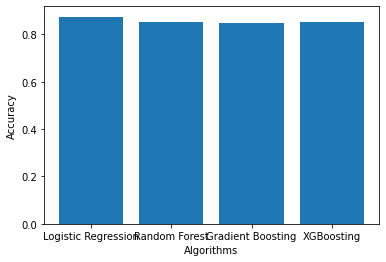

In [135]:
plt.bar(['Logistic Regression','Random Forest', 'Gradient Boosting', 'XGBoosting'],[lr_ac,rf_ac,gb_ac,xg_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [136]:
#input_data = ( 1,28,3,24,3,1,6,3,0,2,2028,14 ) -yes
#input_data = ( 0,32,3,4,3,0,14,3,6,1,6162,12 ) -no
#input_data = ( 0,26,3,5,3,1,8,3,1,1,2366,14 ) -yes
#input_data = ( 1,28,4,8,3,0,6,3,0,3,4936,13 ) -no


#Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardise the input data
std_data = scaler.transform(input_data_reshaped)

prediction = gb_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("No Attrition.")
else:
    print("Attrition Occurs.")

[1]
Attrition Occurs.


# Creation Of Pickle File

In [137]:
import pickle 
import os

In [138]:
model_path = os.path.join('D:/Task 100 Projects/Employee Attrition Analysis/Employee Attrition Analysis/Attrition/',
                          'models/gb.pkl')
with open(model_path,'wb') as model_file:
    pickle.dump(gb_model, model_file)

In [139]:
scaler_path=os.path.join('D:/Task 100 Projects/Employee Attrition Analysis/Employee Attrition Analysis/Attrition/',
                         'models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

In [140]:
import joblib
model_path=os.path.join('D:/Task 100 Projects/Employee Attrition Analysis/Employee Attrition Analysis/Attrition/',
                             'models/gb_model.sav')
joblib.dump(gb_model,model_path)

['D:/Task 100 Projects/Employee Attrition Analysis/Employee Attrition Analysis/Attrition/models/gb_model.sav']